# Auto Dataset Simple Linear Regression Lab (4/26/25)

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

In [3]:
import seaborn as sns # for scatterplot matrix

In [4]:
import statsmodels.api as sm

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [6]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [7]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [8]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [9]:
Auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
ford ranger,28.0,4,120.0,79,2625,18.6,82,1
chevy s-10,31.0,4,119.0,82,2720,19.4,82,1


1. The sm.OLS() function is used to perform a simple linear regression, with "mpg" as the response and "horsepower" as the perdictor. The summarize() function is used to print the results.

Source: https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/

In [10]:
# Defining the predictor
X = pd.DataFrame({"intercept": np.ones(Auto.shape[0]),
                 "mpg": Auto["mpg"]})
X[:4]

,intercept,mpg
name,,
chevrolet chevelle malibu,1.0,18.0
buick skylark 320,1.0,15.0
plymouth satellite,1.0,18.0
amc rebel sst,1.0,16.0


In [11]:
# Defining the response
y = Auto["horsepower"]

In [12]:
# Specifying and fitting the model
model = sm.OLS(y,X)
results = model.fit()

In [13]:
summarize(results)

,coef,std err,t,P>|t|
intercept,194.4756,3.873,50.211,0.0
mpg,-3.8389,0.157,-24.489,0.0


Based on the results, there exists a relationship between the predictor and the response as indicated by the p-values being zero. Small p-values indicate that it is unlikely that the predictor and the response change with each other due to chance; it is also indicated by the parameters' coefficients not equaling zero, rejecting the null hypothesis that "B1 = 0". MPG and horsepower have a strong positive relation with each other, as indicated by the intercept parameter coefficient value.

- Note: intercept is the point where the regression line crosses the y-axis, representing the predict value of the response when all predictors are zero. Since the intercept has no predictor variable next to it (i.e. no x_n) it would just be a numerical term in the linear regression equation.

# Plotting the relation between the response and the predictor

In [14]:
def abline(ax, b, m, *args, **kwargs):
    """Add a line with slope m and intercept b to ax"""
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

In [15]:
print(results.params[0])
print(results.params[1])

194.4756431901868
-3.8388880326580086


C:\Users\elija\AppData\Local\Temp\ipykernel_18996\3933074389.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results.params[0])
C:\Users\elija\AppData\Local\Temp\ipykernel_18996\3933074389.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(results.params[1])


C:\Users\elija\AppData\Local\Temp\ipykernel_18996\2317997179.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\elija\AppData\Local\Temp\ipykernel_18996\2317997179.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


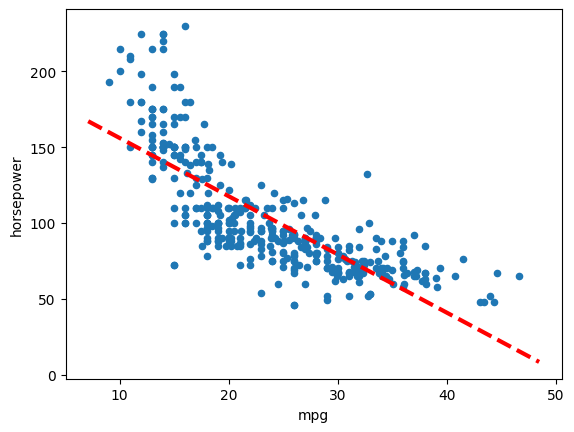

In [16]:
ax = Auto.plot.scatter('mpg', 'horsepower')
abline(ax, 
       results.params[0],
       results.params[1],
       'r--',
       linewidth = 3)

### Diagnostic plots of the least squares regression fit 
- Can fine fitted values and residuals of the fit as attributes of the "results" object
- Various influence measures describing the regression model are computed with the "get_influence()" method

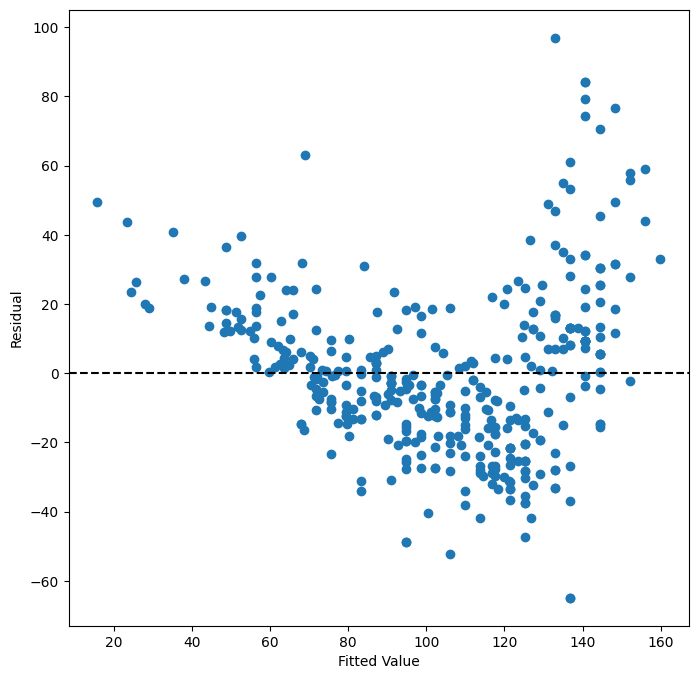

In [17]:
# making a diagnostic plot of the simple least squares regression fit
ax = subplots(figsize = (8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted Value")
ax.set_ylabel("Residual")
ax.axhline(0, c = 'k', ls = '--')

Based on the diagnostic graph (fitted value vs. residual), there may appear to be a U-shaped pattern - a quadratic relationship - between the residual and the fitted value. As the fitted value increases, the residual decreases from a high value between 20 and 50, down to a low value between -60 and -40, but increases back up to a residual value between 50 and 80. A good fitted model does not indicate a clear pattern in its fitted value vs. residual diagnostic plot. But based on the plot between the predictor "mpg" and "horsepower", the simple linear regression fit does appear to be a good fit for the model overall, but it can still be improved via a polynomial fit. 

# Multiple Linear Regression 
- Must use ModelSpec() transform to construct the required model matrix and response
- Will use to produce a scatterplot which uses all the variables in the Auto data set

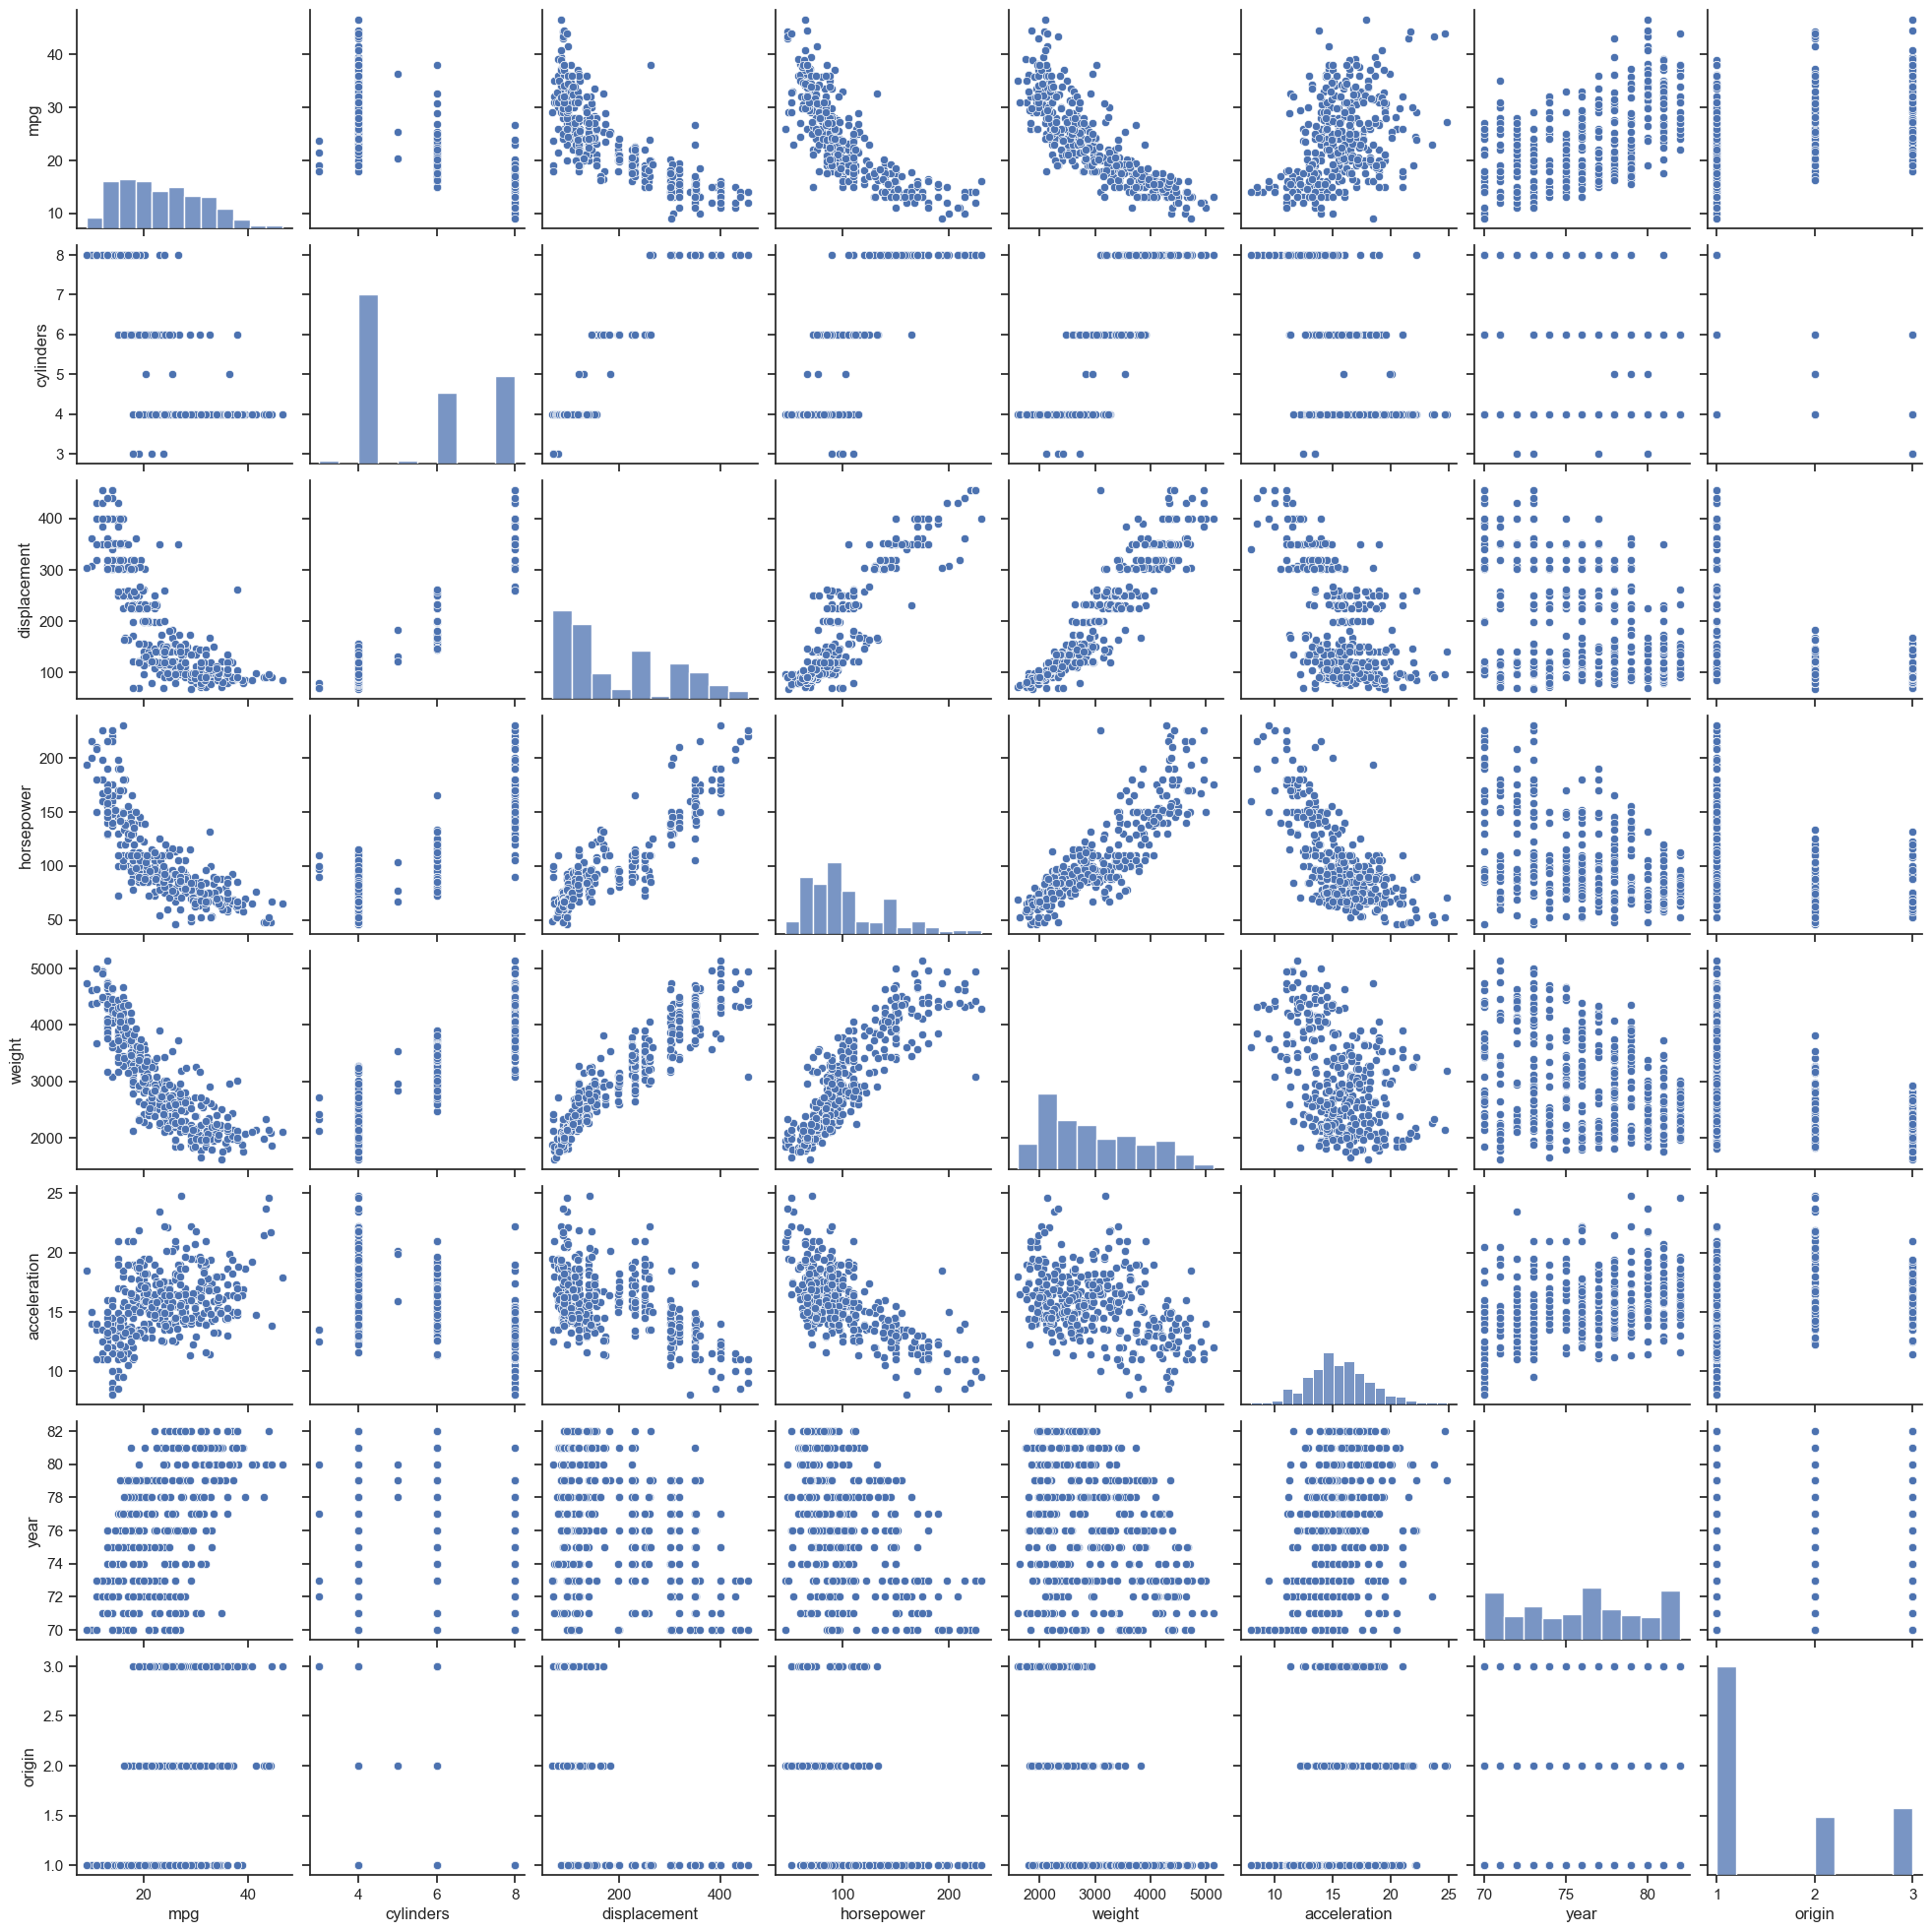

In [18]:
# Making the scatterplot matrix of all the variables
sns.set_theme(style="ticks")
sns.pairplot(Auto)

Source for scatterplot matrix: https://www.geeksforgeeks.org/scatter-plot-matrix/#

In [19]:
# Computing the matrix of correlations
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


Weight, displacement, and cylinders are the predictors which have the highest correlation magnitudes with horsepower. 

In [20]:
# Use ModelSpec() to construct the required model matrix to fit a multiple linear regression model using least squares with just
# mpg and another variable that should be related to horsepower, weight
X = MS(['mpg', 'weight']).fit_transform(Auto)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,31.5072,10.818,2.912,0.004
mpg,-0.9453,0.222,-4.267,0.000
weight,0.0319,0.002,15.694,0.000


In [21]:
terms = Auto.columns.drop('horsepower')
terms

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year',
       'origin'],
      dtype='object')

In [22]:
# Fit the model with all the variables in "terms" with the same model matrix builder
X = MS(terms).fit_transform(Auto)
model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,144.4116,15.830,9.123,0.000
mpg,-0.2313,0.188,-1.230,0.220
cylinders,-2.9746,1.188,-2.503,0.013
displacement,0.1638,0.027,6.128,0.000
weight,0.0199,0.003,7.962,0.000
acceleration,-4.3937,0.289,-15.224,0.000
year,-0.6457,0.233,-2.768,0.006
origin,5.0372,1.030,4.888,0.000


An anova test is used to see if there are statistically significant differences between the means of two groups

In [23]:
anova_lm(results1, results2) 

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,389.0,139771.947746,0.0,NaN,NaN,NaN
1,384.0,58028.947118,5.0,81743.000628,108.185014,4.545893e-71


The F-statistic is used to avoid any potential errors in determing association between predictors and the response variable which t-statistics and -values have. Because the F-statistic is large for the results2 row (row 0 corresponds to results1, row 1 to results2), it shows strong evidence that there is a relationship between the response and the predictors.

Recalling from the correlation matrix above, the predictors weight, displacement, and cylinders have the highest correlation magnitudes with the horsepower predictor.

But based on the summary table of results2, it is the cylinders, acceleration, and origin predictors which appear to have a statistically significant relationship to the horsepower response, due to them having the highest coefficients out of all the other predictors.

The coefficient of "year" suggests that the year of the car slightly impacts its horsepower negatively. This is likely because older cars have had more miles placed on them; went through more damages, whether minor or major; had modifications made to them; and its parts have been through more wear and tear, causing its horsepower to slighly diminish as a result.

## Diagnostic Plots of the Multiple Linear Regression Fit

source: https://www.geeksforgeeks.org/residual-leverage-plot-regression-diagnostic/

### Fitted Values VS. Residual Plot

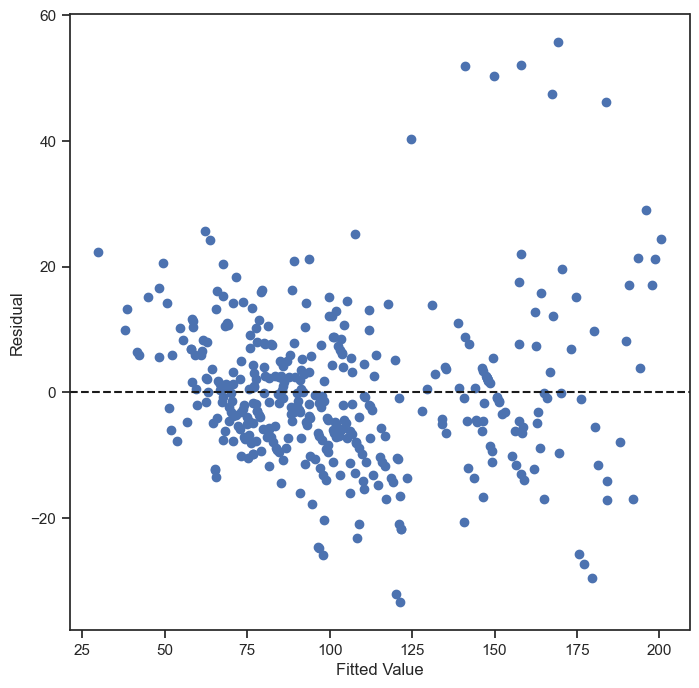

In [24]:
# Making a diagnostic plot of the multiple linear regression fit
ax = subplots(figsize = (8,8))[1]
ax.scatter(results2.fittedvalues, results2.resid)
ax.set_xlabel("Fitted Value")
ax.set_ylabel("Residual")
ax.axhline(0, c = 'k', ls = '--')

The fitted value vs. residual plot does not show any obvious pattern to its plot points, which is a good sign that the multiple linear regression fit ended up being a better fit than the simple linear regression fit.

However, near the top of this plot, it indicates that there are a few outliers between the residual interval of 50 and 60. 

### Leverage Plot
Source: https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_leverage_resid2.html

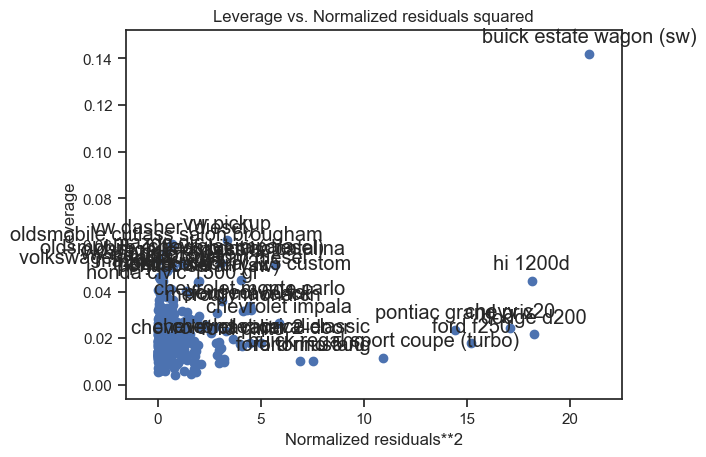

In [25]:
fig = sm.graphics.plot_leverage_resid2(results2)

### Fitting Model With Interactions

In [29]:
X = MS(['mpg', 'weight', ('mpg','weight')]).fit_transform(Auto)
model3 = sm.OLS(y,X)
summarize(model3.fit())

,coef,std err,t,P>|t|
intercept,-15.5689,12.297,-1.266,0.206
mpg,1.9991,0.476,4.201,0.000
weight,0.0524,0.004,14.803,0.000
mpg:weight,-0.0013,0.000,-6.890,0.000


In [30]:
X = MS(['mpg', 'cylinders', ('mpg','cylinders')]).fit_transform(Auto)
model4 = sm.OLS(y,X)
summarize(model4.fit())

,coef,std err,t,P>|t|
intercept,-22.2750,12.677,-1.757,0.08
mpg,3.3365,0.557,5.987,0.00
cylinders,32.1347,2.174,14.784,0.00
mpg:cylinders,-1.0793,0.117,-9.237,0.00


In [31]:
X = MS(['mpg', 'displacement', ('mpg','displacement')]).fit_transform(Auto)
model5 = sm.OLS(y,X)
summarize(model5.fit())

,coef,std err,t,P>|t|
intercept,47.6747,6.806,7.005,0.000
mpg,0.5296,0.248,2.138,0.033
displacement,0.4645,0.028,16.659,0.000
mpg:displacement,-0.0118,0.002,-7.322,0.000


When testing interaction terms from the correlation table, it is found that the mpg:cylinders interaction is the most significant out of all of them, due to it have the highest coefficient magnitude.

## Non-Linear Tranformation of the Variables

In [32]:
X = MS([poly('mpg', degree = 2), 'cylinders']).fit_transform(Auto) 
model6 = sm.OLS(y,X)
results6 = model6.fit()
summarize(results6)

,coef,std err,t,P>|t|
intercept,50.0649,5.982,8.370,0.0
"poly(mpg, degree=2)[0]",-331.6924,33.873,-9.792,0.0
"poly(mpg, degree=2)[1]",131.6497,22.895,5.750,0.0
cylinders,9.9425,1.080,9.209,0.0


In [34]:
anova_lm(results2, results6)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,58028.947118,0.0,NaN,NaN,NaN
1,388.0,134072.994371,-4.0,-76044.047253,55.016841,NaN


The quadratic polynomial is a worse fit than the linear fit because the F value of the quadratic fit is 55, whilst the F value of the multiple linear fit was 108.